# 10.02 SVM 실습(sklearn)

    - iris dataset example
    
    

### 1. IRIS dataset 실습 - SVM predict model

```
특징 변수를 꽃받침의 길이와 폭만 사용
붓꽃 종을 Setosa와 Versicolour만 대상으로 함
```

In [6]:
# 1. 데이터 로드
from sklearn.datasets import load_iris

data_ = load_iris()
dir(data_)

# 2. 데이터프레임 생성
data = pd.DataFrame(data_.data,columns = data_.feature_names)

# 3. species 데이터 시리즈 생성 -> species 종으로 데이터 프레임 결합
sy = pd.Series(data_.target,dtype = 'category')
sy = sy.cat.rename_categories(data_.target_names)

data['species'] = sy
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
# 4. 독립변수 2차원, 종속변수 2차원(species)으로 데이터 축소

data2 = data[['sepal length (cm)','sepal width (cm)','species']]
data2 = data2[data2['species'] != 'virginica']
data2

,sepal length (cm),sepal width (cm),species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
95,5.7,3.0,versicolor
96,5.7,2.9,versicolor
97,6.2,2.9,versicolor
98,5.1,2.5,versicolor


In [8]:
# 종속변수, 독립변수 데이터셋 분리

X = data2[['sepal length (cm)','sepal width (cm)']]
y = data2['species']

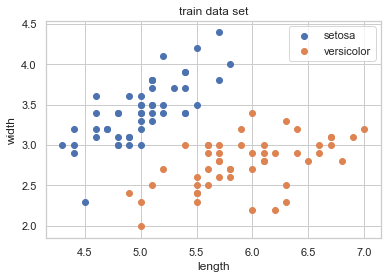

In [22]:
# 5. 데이터 셋 분포 확인 위해 scatter plot 도표

plt.scatter(data2['sepal length (cm)'][data2.species == 'setosa'], data2['sepal width (cm)'][data2.species == 'setosa'], marker='o', label="setosa")
plt.scatter(data2['sepal length (cm)'][data2.species == 'versicolor'], data2['sepal width (cm)'][data2.species == 'versicolor'], marker='o', label="versicolor")
plt.xlabel("length")
plt.ylabel("width")
plt.legend()
plt.title('train data set')
plt.show()

In [10]:
# 6. SVC 클래스 활용한 SVM 학습

from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

In [12]:
# 7. 훈련 결과 확인

print("클래스 별 서포트 벡터 갯수 : {}".format(model.n_support_))
print("클래스 별 서포트 벡터 위치 : {}".format(model.support_))
print("클래스 별 서포트 벡터 값 : {}".format(model.support_vectors_))
print("클래스 별 서포트 벡터 클래스 값 : {}".format(y[model.support_]))

클래스 별 서포트 벡터 갯수 : [2 2]
클래스 별 서포트 벡터 위치 : [36 41 57 84]
클래스 별 서포트 벡터 값 : [[5.5 3.5]
 [4.5 2.3]
 [4.9 2.4]
 [5.4 3. ]]
클래스 별 서포트 벡터 클래스 값 : 36        setosa
41        setosa
57    versicolor
84    versicolor
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]


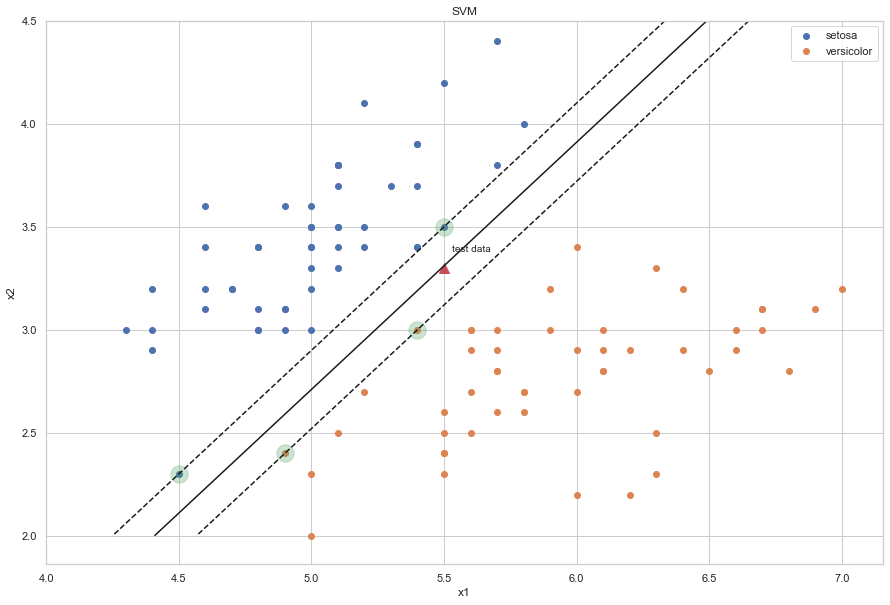

In [23]:
# 8. SVM 경계선 및 현황 시각화

plt.figure(figsize=(15,10))

xx = np.linspace(4, 7, 10)
yy = np.linspace(2, 4.5, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(data2['sepal length (cm)'][data2.species == 'setosa'], data2['sepal width (cm)'][data2.species == 'setosa'], marker='o', label="setosa")
plt.scatter(data2['sepal length (cm)'][data2.species == 'versicolor'], data2['sepal width (cm)'][data2.species == 'versicolor'], marker='o', label="versicolor")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [5.5, 3.3]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "test data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM")

plt.show()

In [14]:
# 9. test data predict

x_new = [[5.5,3.3]]

model.predict(x_new)

array(['versicolor'], dtype=object)

### 2. IRIS dataset 실습 - SVM predict model
    
###    slack variable 변화

```
특징 변수를 꽃잎 길이와 폭만 사용
붓꽃 종을 virginica와 Versicolour만 대상으로 함
```

In [150]:
# 0. 독립변수 2차원, 종속변수 2차원(species)으로 데이터 축소

data3 = data[['petal length (cm)','petal width (cm)','species']]
data3 = data3[data3['species'] != 'setosa']
data3

,petal length (cm),petal width (cm),species
50,4.7,1.4,versicolor
51,4.5,1.5,versicolor
52,4.9,1.5,versicolor
53,4.0,1.3,versicolor
54,4.6,1.5,versicolor
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


In [151]:
# 1. 종속변수, 독립변수 데이터셋 분리

X_new = data3[['petal length (cm)','petal width (cm)']]
y_new = data3[data3['species']!='setosa'].species

In [152]:
# 1-1. 데이터셋의 인덱스 초기화

X_new = X_new.reset_index().drop(columns=['index'])
y_new = y_new.reset_index().drop(columns=['index'])

In [153]:
# 1-2. 데이터셋의 인덱스 초기화 -> 시리즈 형태로 변화

y_new_ = list(y_new.species)
y_new = pd.Series(y_new_)
y_new

0     versicolor
1     versicolor
2     versicolor
3     versicolor
4     versicolor
         ...    
95     virginica
96     virginica
97     virginica
98     virginica
99     virginica
Length: 100, dtype: object

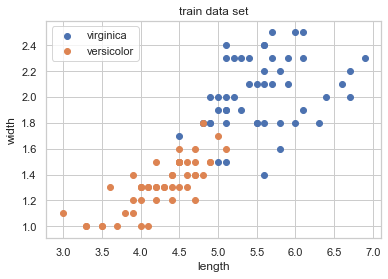

In [154]:
# 2. 데이터 셋 분포 확인 위해 scatter plot 도표

plt.scatter(data3['petal length (cm)'][data3.species == 'virginica'], data3['petal width (cm)'][data3.species == 'virginica'], marker='o', label="virginica")
plt.scatter(data3['petal length (cm)'][data3.species == 'versicolor'], data3['petal width (cm)'][data3.species == 'versicolor'], marker='o', label="versicolor")
plt.xlabel("length")
plt.ylabel("width")
plt.legend()
plt.title('train data set')
plt.show()

In [155]:
# 3. SVC 클래스 활용한 SVM 학습

from sklearn.svm import SVC
model_new = SVC(kernel='linear', C=10).fit(X_new, y_new)
model_new_smallc = SVC(kernel='linear', C=0.1).fit(X_new, y_new)

In [156]:
# 7. 훈련 결과 확인

print("클래스 별 서포트 벡터 갯수 : {}".format(model_new.n_support_))
print("클래스 별 서포트 벡터 위치 : {}".format(model_new.support_))
print("클래스 별 서포트 벡터 값 : {}".format(model_new.support_vectors_))
print("클래스 별 서포트 벡터 클래스 값 : {}".format(y_new[model_new.support_]))

클래스 별 서포트 벡터 갯수 : [7 8]
클래스 별 서포트 벡터 위치 : [ 2  6 20 22 27 33 36 56 69 73 76 77 83 84 88]
클래스 별 서포트 벡터 값 : [[4.9 1.5]
 [4.7 1.6]
 [4.8 1.8]
 [4.9 1.5]
 [5.  1.7]
 [5.1 1.6]
 [4.7 1.5]
 [4.5 1.7]
 [5.  1.5]
 [4.9 1.8]
 [4.8 1.8]
 [4.9 1.8]
 [5.1 1.5]
 [5.6 1.4]
 [4.8 1.8]]
클래스 별 서포트 벡터 클래스 값 : 2     versicolor
6     versicolor
20    versicolor
22    versicolor
27    versicolor
33    versicolor
36    versicolor
56     virginica
69     virginica
73     virginica
76     virginica
77     virginica
83     virginica
84     virginica
88     virginica
dtype: object


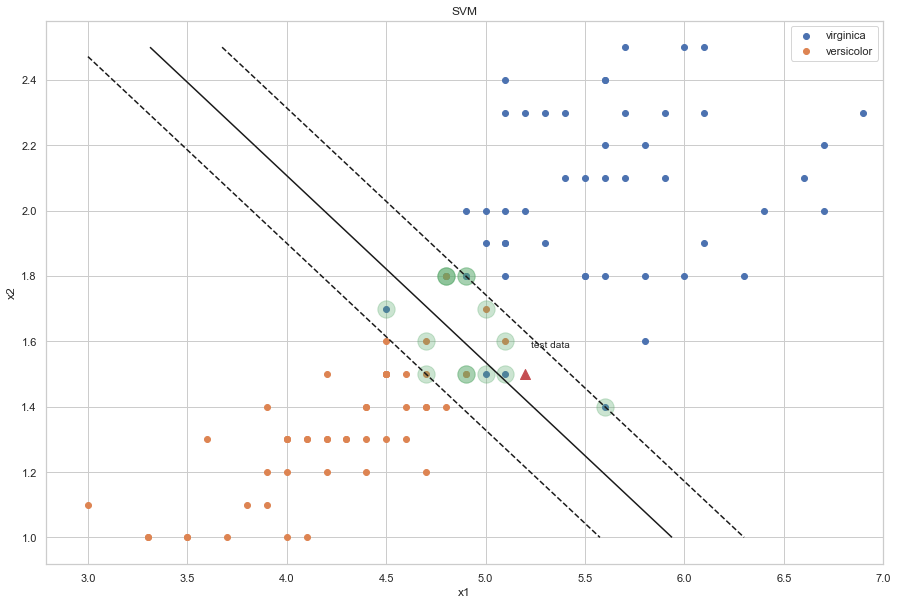

In [157]:
# 8. SVM 경계선 및 현황 시각화

plt.figure(figsize=(15,10))

xx = np.linspace(3, 7, 10)
yy = np.linspace(1, 2.5, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model_new.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(data3['petal length (cm)'][data3.species == 'virginica'], data3['petal width (cm)'][data3.species == 'virginica'], marker='o', label="virginica")
plt.scatter(data3['petal length (cm)'][data3.species == 'versicolor'], data3['petal width (cm)'][data3.species == 'versicolor'], marker='o', label="versicolor")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model_new.support_vectors_[:, 0], model_new.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [5.2, 1.5]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "test data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM")

plt.show()

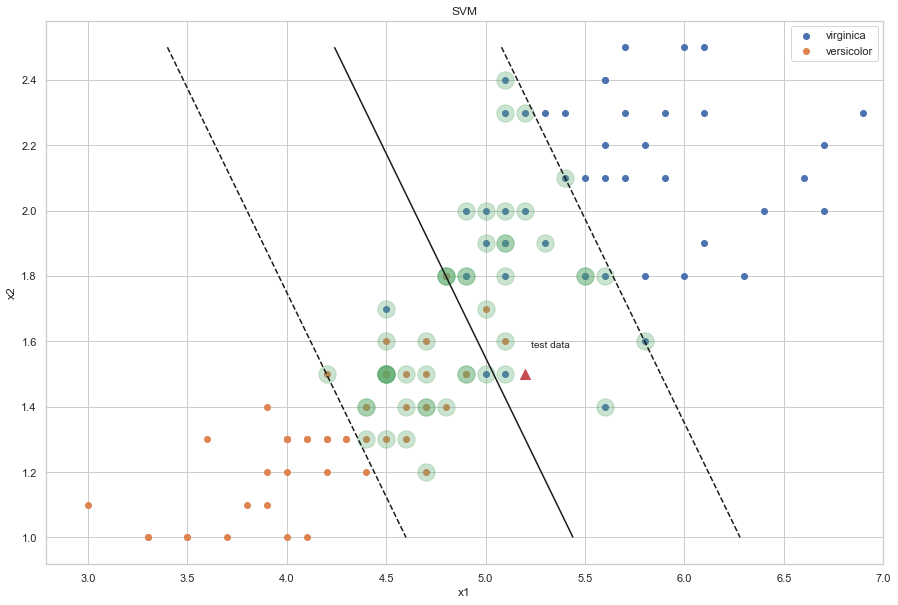

In [158]:
# 8. SVM 경계선 및 현황 시각화 (small C)
# 시사점 : small C 의 경우, 마진이 넓어지며 안정적인 경계선을 갖게 됨을 확인 가능 -> 보다 새로운 데이터에도 안정적인 성능을 내는 모델이 될 것.

plt.figure(figsize=(15,10))

xx = np.linspace(3, 7, 10)
yy = np.linspace(1, 2.5, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model_new_smallc.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(data3['petal length (cm)'][data3.species == 'virginica'], data3['petal width (cm)'][data3.species == 'virginica'], marker='o', label="virginica")
plt.scatter(data3['petal length (cm)'][data3.species == 'versicolor'], data3['petal width (cm)'][data3.species == 'versicolor'], marker='o', label="versicolor")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model_new_smallc.support_vectors_[:, 0], model_new_smallc.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [5.2, 1.5]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "test data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM")

plt.show()

In [146]:
print("클래스 별 서포트 벡터 갯수 : {}".format(model_new_smallc.n_support_))

클래스 별 서포트 벡터 갯수 : [25 25]


In [159]:
print("클래스 별 서포트 벡터 갯수 : {}".format(model_new_smallc.n_support_))
print("클래스 별 서포트 벡터 위치 : {}".format(model_new_smallc.support_))
print("클래스 별 서포트 벡터 클래스 값 : {}".format(y_new[model_new_smallc.support_]))

클래스 별 서포트 벡터 갯수 : [25 25]
클래스 별 서포트 벡터 위치 : [ 0  1  2  4  5  6  8 11 13 15 16 18 20 22 23 25 26 27 28 33 34 35 36 37
 41 51 53 56 60 61 63 64 66 69 71 73 76 77 79 83 84 87 88 89 91 92 95 96
 97 99]
클래스 별 서포트 벡터 클래스 값 : 0     versicolor
1     versicolor
2     versicolor
4     versicolor
5     versicolor
6     versicolor
8     versicolor
11    versicolor
13    versicolor
15    versicolor
16    versicolor
18    versicolor
20    versicolor
22    versicolor
23    versicolor
25    versicolor
26    versicolor
27    versicolor
28    versicolor
33    versicolor
34    versicolor
35    versicolor
36    versicolor
37    versicolor
41    versicolor
51     virginica
53     virginica
56     virginica
60     virginica
61     virginica
63     virginica
64     virginica
66     virginica
69     virginica
71     virginica
73     virginica
76     virginica
77     virginica
79     virginica
83     virginica
84     virginica
87     virginica
88     virginica
89     virginica
91     virginica
92     virginica

### 3. MNIST Digit Image 실습 - SVM predict model

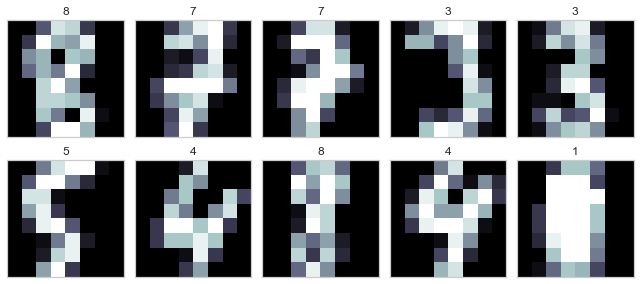

In [160]:
# 1. 데이터 로드 및 시각화 확인

from sklearn.datasets import load_digits
digits = load_digits()

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(digits.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target[k])
plt.tight_layout()
plt.show()

In [ ]:
# 2. train-test set 분리 + train set 학습(SVM - SVC클래스 활용)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

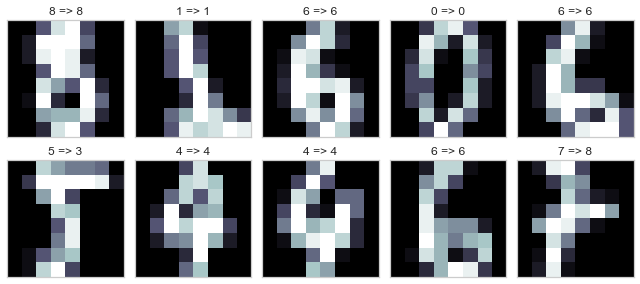

In [164]:
# 3. 실제 값 vs 예측 값(SVM) 비교

N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(8,8), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" %
                  (y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()

In [165]:
# 4. 성능 확인

from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [169]:
# train set 대상 분류 성능은 100%

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       106
           3       1.00      1.00      1.00       113
           4       1.00      1.00      1.00       118
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00       105
           7       1.00      1.00      1.00       114
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00       106

    accuracy                           1.00      1078
   macro avg       1.00      1.00      1.00      1078
weighted avg       1.00      1.00      1.00      1078



In [168]:
# test set 대상 분류 성능은 약간 오차가 있음

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.95      0.97      0.96        73
           2       1.00      0.99      0.99        71
           3       0.95      0.99      0.97        70
           4       0.98      1.00      0.99        63
           5       0.97      0.97      0.97        89
           6       0.99      0.99      0.99        76
           7       1.00      0.98      0.99        65
           8       0.96      0.92      0.94        78
           9       0.97      0.96      0.97        74

    accuracy                           0.97       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.97      0.97       719

